### Bernoulli Distribution

Question 1-A

A vote with outcome 𝑓𝑜𝑟 or 𝑎𝑔𝑎𝑖𝑛𝑠𝑡 follows a Bernoulli distribution where 𝑃(vote = "𝑓𝑜𝑟") = 0.82. Represent the proportion of “for” and “against” in this single Bernoulli trial using agraphics and a percentage. Can an expectation be calculated? Justify your answer.


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, poisson

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
p = round(float(input("Enter probability value in Favor: ")),2) ##0.3 given in the question
q = 1-p
print("Probability in Favor(Votes For):",p , 'or', p*100,'%')
print("Probability Against(Votes Against):", round((1-p),2), 'or', round((q*100),2), '%')

Enter probability value in Favor: 0.3
Probability in Favor(Votes For): 0.3 or 30.0 %
Probability Against(Votes Against): 0.7 or 70.0 %


##### Reference for Chart: https://www.tutorialspoint.com/python_data_science/python_bernoulli_distribution.htm#:~:text=The%20Bernoulli%20distribution%20is%20a,number%20of%20observation%20is%201.&text=We%20use%20various%20functions%20in,values%20for%20a%20bernoulli%20distribution.

Text(0.5, 1.0, 'Bernoulli Distribution')

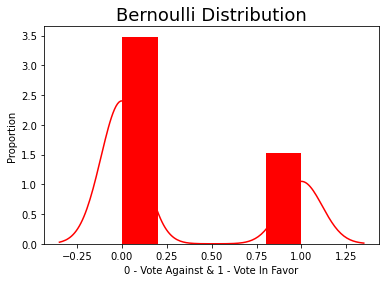

<Figure size 1800x1440 with 0 Axes>

In [5]:
bern_dist = bernoulli.rvs(size=1000,p=p)
bern_plot = sns.distplot(bern_dist,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 25,'alpha':1})

plt.figure(figsize=(25,20))

bern_plot.set(xlabel='Bernouli', ylabel='Frequency')
bern_plot.set(xlabel='0 - Vote Against & 1 - Vote In Favor', ylabel='Proportion')
bern_plot.set_title('Bernoulli Distribution', fontdict={'fontsize': 18, 'fontweight': 'medium'})

In [6]:
class bernoulli():
    def pmf(x,p):
        """
        probability mass function        
        """
        f = p**x*(1-p)**(1-x)
        return f
    
    def mean(p):
        """
        expected value of bernoulli random variable
        """
        return p
    
    def var(p):
        """
        variance of bernoulli random variable
        """
        return p*(1-p)
    
    def std(p):
        """
        standart deviation of bernoulli random variable
        """
        return bernoulli.var(p)**(1/2)
    
    def rvs(p,size=1):
        """
        random variates
        """
        rvs = np.array([])
        for i in range(0,size):
            if np.random.rand() <= p:
                a=1
                rvs = np.append(rvs,a)
            else:
                a=0
                rvs = np.append(rvs,a)
        return rvs

In [7]:
p=0.2
bernoulli.rvs(p,size=1)

array([0.])

### Poisson Distribution 

Question 1-b

The number of meteorites falling on an ocean in a given year can be modelled by a Poisson distribution with an expectation of 𝜆 = 39. Explain why a Poisson distribution is a natural candidate for this phenomenon. Give a graphic showing the probability of one, two, three… meteorites falling (until the probability is less than 0.5%). Calculate the median and variance and show them graphically on this graphic

In [8]:
# Importing the statistics module
import statistics

In [9]:
### Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

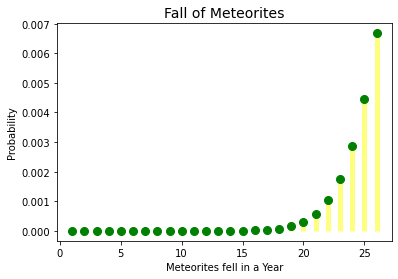

In [10]:
prob = 0.0
k = 1 #(at quantile k)
mu = 39
while prob < 0.005:
    prob = poisson.pmf(k,mu)
    k+=1

fig, ax = plt.subplots(1, 1)
x = np.arange(1,k)

ax.plot(x, poisson.pmf(x, mu),'bo',ms=8, label='poisson pmf', color = 'green')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='yellow', lw=5, alpha=0.5)

#Formatting visuals
ax.set_title('Fall of Meteorites', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel('Meteorites fell in a Year',fontsize=10)
plt.ylabel('Probability',fontsize=10)

plt.show()

In [11]:
poisson.pmf(k=5, mu=37)

4.9309607303212387e-11

In [12]:
poisson.cdf(k=1, mu=37)

3.2425580977827415e-15

(array([0.001  , 0.00275, 0.021  , 0.04725, 0.064  , 0.058  , 0.032  ,
        0.0155 , 0.007  , 0.0015 ]),
 array([18., 22., 26., 30., 34., 38., 42., 46., 50., 54., 58.]),
 <BarContainer object of 10 artists>)

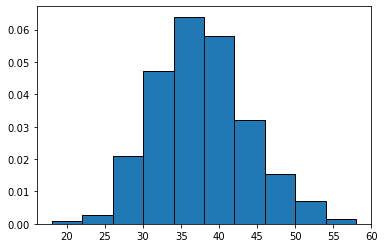

In [13]:
x = poisson.rvs(mu=37,size=1000)
plt.hist(x, density=True, edgecolor='black')

In [14]:
def poisson_distribution(k, lambd):
    return (lambd ** k * np.exp(-lambd)) / np.math.factorial(k)

poisson_distribution(k=1, lambd=37)

3.1572276215253042e-15

In [15]:
from scipy.stats import poisson

poisson.pmf(1, 37)

3.157227621525308e-15

<BarContainer object of 37 artists>

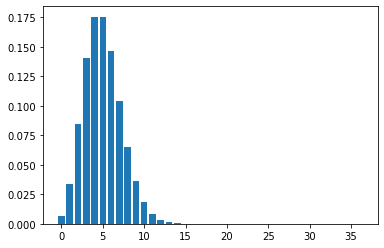

In [16]:
lambd=5

k_axis = np.arange(0, 37)
distribution = np.zeros(k_axis.shape[0])
for i in range(k_axis.shape[0]):
    distribution[i] = poisson.pmf(i, lambd)

plt.bar(k_axis, distribution)
# [...] Add axes, labels...


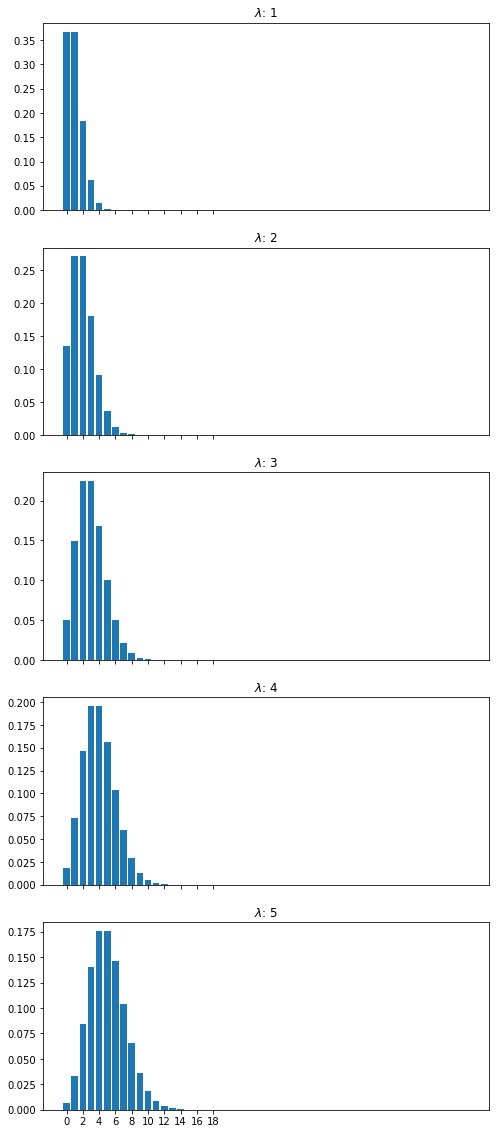

In [17]:
f, axes = plt.subplots(5, figsize=(8, 20), sharex=True)

for lambd in range(1, 6):

    k_axis = np.arange(0, 50)
    distribution = np.zeros(k_axis.shape[0])
    for i in range(k_axis.shape[0]):
        distribution[i] = poisson.pmf(i, lambd)

    axes[lambd-1].bar(k_axis, distribution)
    axes[lambd-1].set_xticks(np.arange(0, 20, 2))
    axes[lambd-1].set_title(f"$\lambda$: {lambd}")

# Add axes labels etc.

In [33]:
mean,var = poisson.stats(mu, moments='mv')

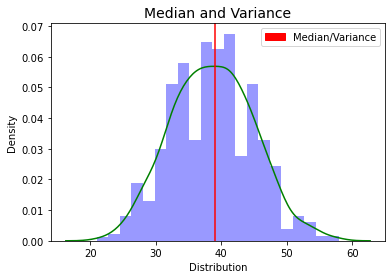

In [34]:
import matplotlib.patches as mpatches

plot_dist = poisson.rvs(mu=39, size=1000)

ax = sns.distplot(plot_dist,
                  kde=True,
                  kde_kws={"color": "g"},
                  hist_kws={"color": "blue"})

median_var = plt.axvline(x=poisson.median(mu, loc=0),color='red')

plt.xlabel('Distribution',fontsize=10)
ax.set_title('Median and Variance', fontdict={'fontsize': 14, 'fontweight': 'medium'})


median_var_patch = mpatches.Patch(color='red', label='Median/Variance')
plt.legend(handles=[median_var_patch])

plt.show()


#### Question 1 -c 
Let 𝑌 be the random variable with the time to hear an owl from your room’s open window (in hours). Assume that the probability that you still need to wait to hear the owl after 𝑦 hours is: 
0⋅(I7) ̅ⅇ^(-0⋅5y)+ 0.(82) ̅ⅇ^(-0.25y)
Find the probability that you need to wait between 2 and 4 hours to hear the owl, compute and display the probability density function graph as well as a histogram by the minute. Compute and display in the graphics the mean, variance, and quartiles of the waiting times.


In [35]:
#Let p1 be probability to wait for 2 hours
#Let p2 be probability to wait for 4 hours

p1 = 1 - ((0.17*np.exp(-0.5*2)) + (0.82*np.exp(-0.25*2))) # calcuate function value for 2 hours
p2 = 1 - ((0.17*np.exp(-0.5*4)) + (0.82*np.exp(-0.25*4))) # calcuate function value for 4 hours
print(p2-p1)

0.23522650605269768


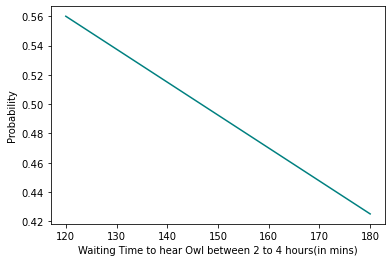

In [36]:
y=np.arange(2,4)
min_array=[]
probab_array=[]

##defining the function
for ey in np.round(y,2):
    p = (0.17*np.exp(-0.5*ey)) + (0.82*np.exp(-0.25*ey)) ##above function plotted here
    min_array.append(int(np.round(ey*60 , 0))) ##multiplied by 60 as we have 60 mins in an hour)
    probab_array.append(np.round(p,3))

df = pd.DataFrame({'Minutes':min_array, 'Probability':probab_array})
plt.plot(df.Minutes,df.Probability,'Teal')
plt.ylabel('Probability')
plt.xlabel('Waiting Time to hear Owl between 2 to 4 hours(in mins)')
plt.show()

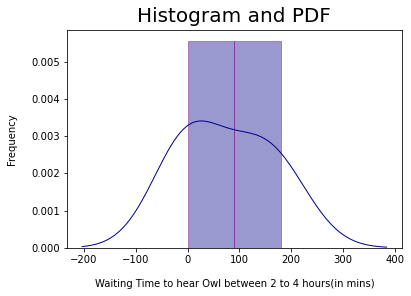

In [37]:
##Probability Density and Histogram showcasing the waiting period to hear an owl

plt.xlabel("Waiting Time to hear Owl between 2 to 4 hours(in mins)", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Histogram and PDF", fontsize=20, y=1.01);
sns.distplot(df, hist= True, kde=True, color='darkblue', hist_kws={'edgecolor':'purple'},
             kde_kws={'linewidth': 1})

plt.show()

          Minutes  Probability
count    2.000000     2.000000
mean   150.000000     0.492500
std     42.426407     0.095459
min    120.000000     0.425000
25%    135.000000     0.458750
50%    150.000000     0.492500
75%    165.000000     0.526250
max    180.000000     0.560000


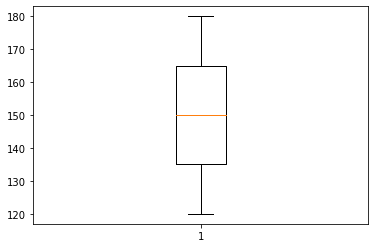

In [38]:
#Compute and display in the graphics the mean, variance, and quartiles of the waiting times.

#using desrcibe function first to check for mean and quartiles
print(df.describe())

#mean and median have same values so boxplot suffices our need to showcase mean and quartiles
plt.boxplot(df['Minutes'])
plt.show()

Minutes        1800.000000
Probability       0.009113
dtype: float64


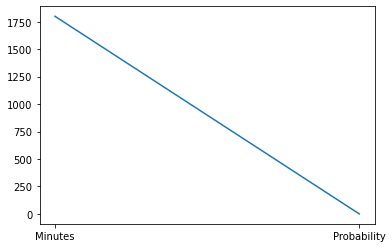

In [39]:
print(df.var())
plt.plot(df.var())
plt.show()


#### 2. BASIC PROBABILITY AND VISUALISATION
For each of the distributions below, please provide the requested graphics as well as the numeric results. In both cases, please provide how you realized these (calculations, code, steps…) and why it is the appropriate tools. Do not forget to include the scale of each graphics so a reader can read the numbers represented. 
a)	Consider the variables 𝑋 and 𝑌. The realization of a sample of size 20 is given below (where 𝑋 is the first variable and 𝑌 is the second): 
(-6.793, -490.71), (0.928, 454.84), (-1.931, 442.81), (5.659, 1038.3), (7.225, 809.35), (-1.163, 51.38), (1.102, -160.67), (2.889, -250.55), (2.701, 408.57), (2.839, -35.78), (-0.234, 665.44), (4.489, -85.61), (4.543, 410.42), (0.541, 988.77), (-2.432, 84.91), (0.009, -483.3), (-3.622, 2.97), (-3.909, -312.25), (8.945, 131.63), (-2.054, -43.55)

Sketch an appropriate plot that displays the values of these points. Calculate the sample covariance as well as the sample’s expectations and variances of 𝑋 and 𝑌. 




In [21]:
data = pd.DataFrame([(-6.793, -490.71), (0.928, 454.84), (-1.931, 442.81), (5.659, 1038.3), 
                     (7.225, 809.35), (-1.163, 51.38), (1.102, -160.67), (2.889, -250.55), 
                     (2.701, 408.57), (2.839, -35.78), (-0.234, 665.44), (4.489, -85.61), 
                     (4.543, 410.42), (0.541, 988.77), (-2.432, 84.91), (0.009, -483.3), 
                     (-3.622, 2.97), (-3.909, -312.25), (8.945, 131.63), (-2.054, -43.55)], columns =('X','Y'))
data.head()

,X,Y
0,-6.793,-490.71
1,0.928,454.84
2,-1.931,442.81
3,5.659,1038.30
4,7.225,809.35


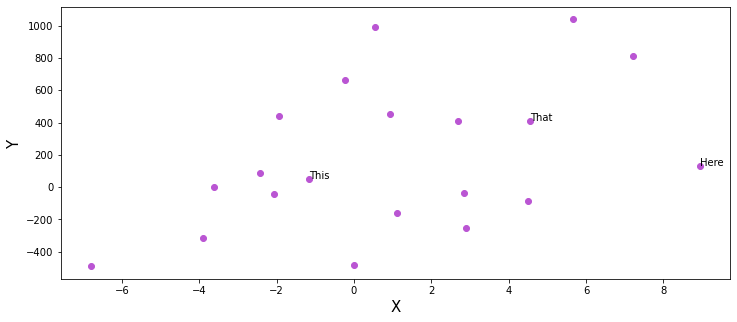

In [22]:
plt.figure(figsize=(12,5))

plt.scatter(data["X"], data["Y"], color = 'mediumorchid')
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)


plt.text(-1.163, 51.38, 'This')
plt.text(4.543, 410.42,'That')
plt.text(8.945, 131.63, 'Here')

plt.show()

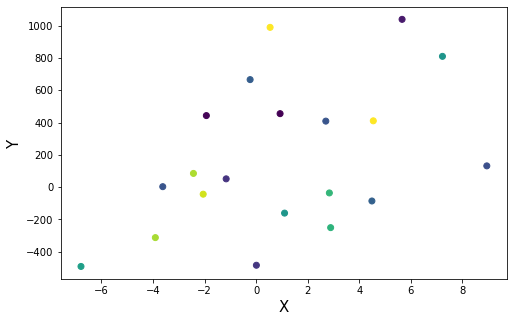

In [23]:
##Reference: https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

plt.figure(figsize=(8,5))
N = 20
x = data['X']
y = data['Y']
colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.scatter(x, y,c=colors)
plt.show()

In [24]:

# find out covariance with respect  columns
cov_mat = np.stack((data['X'], data['Y']), axis = 0)
 
print(np.cov(cov_mat))

[[1.58654707e+01 8.00629723e+02]
 [8.00629723e+02 2.06965030e+05]]


In [25]:
np.cov([data['X'],data['Y']], bias = True)[0][1]

760.5982364000001

In [26]:
data.var()

X        15.865471
Y    206965.030224
dtype: float64

### Q4. Hypothesis Test
Over a long period of time, the production of 1000 high-quality hammers in a factory seems to have reached a weight with an average of 971𝑔 and standard deviation of 32.1 𝑔. Propose a model for the weight of the hammers including a probability distribution for the weight. What are the assumptions for this model to hold? What parameters does this model have?
 A new production system is configured, and one wants to evaluate if the new system makes more constant weights. For this a random sample of newly produced hammers is evaluated yielding the following weights: 917, 776, 791, 757, 849, 810, 836, 815, 786, 862. What hypothesis can you formulate and what test and decision rule can you make to estimate if the new system produces a more constant weight? 
Express these assertions as logical statements involving critical values. What error probabilities can you suggest and why? Calculate the 𝑝-value. Perform the test and express conclusions. 


In [40]:
m1 = 971.1
s1 =15.2
N = 10

s_weights = [917, 776, 791, 757, 849, 810, 836, 815, 786, 862]
m2 = sum(s_weights)/10
m2


819.9

#### Reference: https://www.javatpoint.com/t-test-in-python

In [41]:

# Importing the required libraries and packages  
import numpy as np  
from scipy import stats      
N = 10  # Sample Size  
SD = statistics.stdev(s_weights) # Calculating the Standard Deviation
# Calculating the T-Statistics  
tval = (m1 - m2) / (SD * np.sqrt(2 / N))  
# Comparing with the critical T-Value  
# Degrees of freedom  
dof = 2 * N - 2  
# p-value after comparison with the T-Statistics  
pval = 1 - stats.t.cdf( tval, df = dof)  
print("t = " + str(tval))  
print("p = " + str(2 * pval))  


t = 7.119396685322124
p = 1.2373377145102893e-06
